# The Jaynes-Cummings model with damping - frequency domain

In this notebook you will build upon what you've done with Qutip in Module 1. The aspect that this notebook will focus on is a frequency domain picture of a coupled 'atom'-cavity system.

### Exercise 1:

Let's return to the Jaynes-Cummings model from Notebook 1

$$
H_{JC} = \omega_c a^{\dagger} a + \frac{\omega_a}{2} \sigma_z + g (a \sigma_+ + a^\dagger \sigma_-).
$$

What we are interested in is the spectrum of the coupled 'atom'-cavity system as a function of $\delta = \omega_a - \omega_c$.

Use qutip to define $H_{JC}$, using the following parameters:

$\omega_c = 1$, $\delta = 0$, and $g = 1$. Also, use a truncation of nmax = 2.

Now define three collapse operators (see Extra Notebook 1 - Damping for more information about collapse operators):

$\sqrt{\kappa(1+n_{th})} a$, $\sqrt{\kappa(n_{th})} a^\dagger$ and $\sqrt{\gamma} \sigma_-$

using $\kappa = 10$, $\gamma = 0$, and $n_{th} = 0.25$. Here $n_{th}$ is the average number of quanta of the reservoir in the mode of frequency $ω_c$, so $n_{th} \neq 0$ allows for a non-zero temperature of the reservoir.


The spectrum of the coupled system as a function of frequency can be written as the Fourier transformation of a correlator:

$$S(\omega) = \displaystyle\int_\infty^\infty \langle a^{\dagger}(\tau) a(0) \rangle e^{-i\omega \tau} d\tau$$

The correlation $\langle a^{\dagger}(\tau) a(0) \rangle$ can be calculated using the function correlation_2op_1t in qutip, and the Fourier transform by spectrum_correlation_fft.

Plot the output function $S(\omega)$ as a function of $\delta$.

In [50]:
import numpy as np
import matplotlib.pyplot as plt

import qutip as qt

%matplotlib inline

help(qt.correlation_2op_1t)
help(qt.spectrum_correlation_fft)
help(qt.spectrum)

Help on function correlation_2op_1t in module qutip.correlation:

correlation_2op_1t(H, state0, taulist, c_ops, a_op, b_op, solver='me', reverse=False, args={}, options=<qutip.solver.Options object at 0x0000022C56D8F588>)
    Calculate the two-operator two-time correlation function:
    :math:`\left<A(t+\tau)B(t)\right>`
    along one time axis using the quantum regression theorem and the evolution
    solver indicated by the `solver` parameter.
    
    Parameters
    ----------
    
    H : Qobj
        system Hamiltonian, may be time-dependent for solver choice of `me` or
        `mc`.
    state0 : Qobj
        Initial state density matrix :math:`\rho(t_0)` or state vector
        :math:`\psi(t_0)`. If 'state0' is 'None', then the steady state will
        be used as the initial state. The 'steady-state' is only implemented
        for the `me` and `es` solvers.
    taulist : array_like
        list of times for :math:`\tau`. taulist must be positive and contain
        the element 

See Code for Exercise 2

### Exercise 2:

Repeat Exercise 1 for the different values in the table in the previous notebook:

|       | $\Delta$ | $g$ | $\kappa$ | $\gamma$ |
|-------|------|------|------|------
| Set I | 0    |   1  |  10  |  0   |
| Set II | 0    |  1   |  0   |  10  |
| Set III | 0    | 10  | 1  | 1  |

What is your interpretation of the case where $\kappa = 0$ ? What happens if you make $\kappa$ very small rather than exactly 0?

What happens if you change the value of nmax in Set III?

In [51]:
# Solution

def jc_model_damped_spectrum(tlist, om_c, delta, g, kappa, gamma, nmax):
    """
    This function 
    
    tlist = list of times at which to compute expectation values
    om_c = frequency of cavity
    delta = detuning between atom and cavity
    g = coupling strength
    kappa = photon damping/loss rate
    gamma = atom damping/loss rate
    nmax = Hilbert space truncation (5 by default)
    n_th = average number of quanta in the reservoir
    
    Instead of returning the full output, the function returns a list of frequencies and S(omega)
    """

    idc = qt.identity(nmax)  # identiy operator on oscillator ("c" for "cavity")
    ida = qt.identity(2)  # identity operator on atom
    
    a = qt.tensor(qt.destroy(nmax), ida)  # annihilation operator
    sz = qt.tensor(idc, qt.sigmaz())  # Pauli-z
    sm = qt.tensor(idc, qt.sigmam())  # atom lowering operator
    sp = qt.tensor(idc, qt.sigmap())  # atom raising operator
    
    H = om_c * a.dag() * a + (om_c + delta) * sm.dag() * sm + g * (a.dag() * sm + a * sm.dag())
    
    n_th = 0.25
    
    c_ops = [np.sqrt(kappa * (1 + n_th)) * a, np.sqrt(kappa*n_th) * a.dag(), np.sqrt(gamma) * sm]
    corr = qt.correlation_2op_1t(H,None,tlist,c_ops,a.dag(),a)
    
    wlist1,spec1 = qt.spectrum_correlation_fft(tlist,corr)
     
    return wlist1, spec1

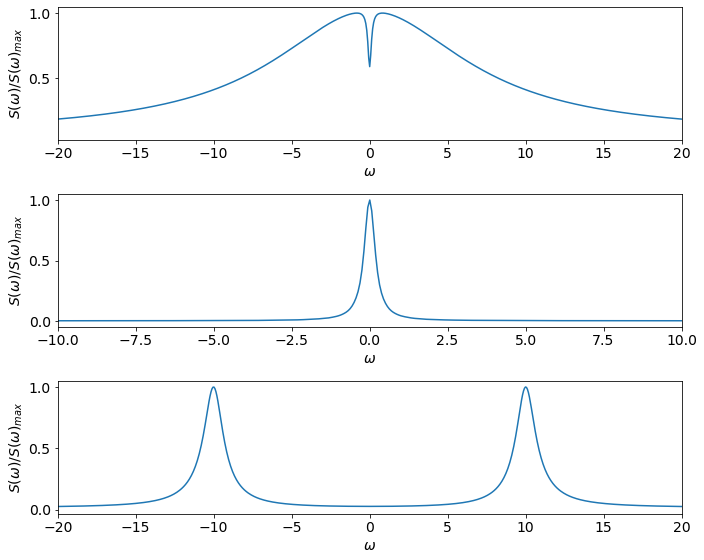

In [52]:
fig = plt.figure(figsize=(10, 8))  # create a new figure with desired size
plt.rc('font', size=14)  # Use a larger font size than the default 10pt

ax = fig.add_subplot(3, 1, 1)
bx = fig.add_subplot(3, 1, 2)
cx = fig.add_subplot(3, 1, 3)

tlist = np.linspace(0, 100, 5000)

om_c = 1
delta = 0

g = 1
kappa = 10
gamma = 0

plot_lim = 20

wa, speca = jc_model_damped_spectrum(tlist, om_c, delta, g, kappa, gamma,2)
ax.plot(wa-om_c, speca/np.max(speca))
ax.set_xlim(-plot_lim,plot_lim)

g = 1
kappa = 1e-5
gamma = 10

plot_lim = 10

wb, specb = jc_model_damped_spectrum(tlist, om_c, delta, g, kappa, gamma,2)
bx.plot(wb-om_c, specb/np.max(specb))
bx.set_xlim(-plot_lim,plot_lim)

g = 10
kappa = 1
gamma = 1

plot_lim = 20

wc, specc = jc_model_damped_spectrum(tlist, om_c, delta, g, kappa, gamma,2)
cx.plot(wc-om_c, specc/np.max(specc))
cx.set_xlim(-plot_lim,plot_lim)

ax.set_ylabel(r'$S(\omega)/S(\omega)_{max}$')
bx.set_ylabel(r'$S(\omega)/S(\omega)_{max}$')
cx.set_ylabel(r'$S(\omega)/S(\omega)_{max}$')

ax.set_xlabel(r'$\omega$')
bx.set_xlabel(r'$\omega$')
cx.set_xlabel(r'$\omega$')

fig.tight_layout()

### Exercise 3:

Build on Exercises 1 and 2 to create a 2D plot with frequency on the horizontal axis and $\delta$ on the vertical axis/.

Use the parameters: $g = \kappa = \gamma = 1$.


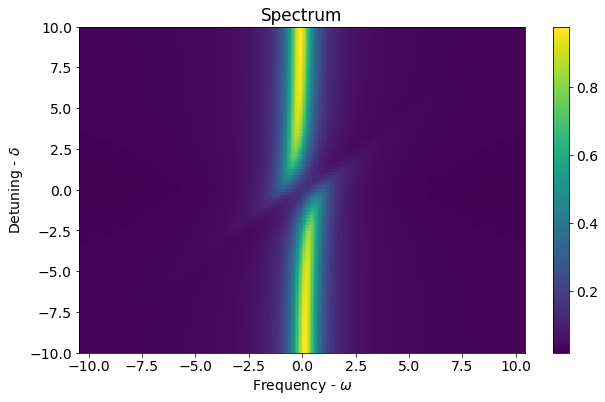

In [53]:
tlist = np.linspace(0, 100, 1000)

om_c = 1
delta = 0

g = 1
kappa = 1
gamma = 1

Detuning_vec = np.linspace(-10,10,100)

spec_list = []
for Delta in Detuning_vec:
    w1,spec1 = jc_model_damped_spectrum(tlist, om_c, Delta, g, kappa, gamma,5)
    spec_list.append(spec1)
plt.subplots(1,1,figsize = (10,6))
z_min, z_max = -np.abs(spec_list).max(), np.abs(spec_list).max()

plt.pcolor(w1-om_c,Detuning_vec,np.abs(spec_list))
plt.axis([np.min(w1)/3,np.max(w1)/3,np.min(Detuning_vec),np.max(Detuning_vec)])
plt.xlabel('Frequency - $\omega$')
plt.ylabel('Detuning - $\delta$')
plt.title('Spectrum')
plt.colorbar()